In [41]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [64]:
df_01_21 = pd.read_parquet('/home/timur/work_hub/mlops_zoomcamp_2024/01-intro/data/green_tripdata_2021-01.parquet')
df_02_21 = pd.read_parquet('/home/timur/work_hub/mlops_zoomcamp_2024/01-intro/data/green_tripdata_2021-02.parquet')

Filtering the data. Choose only 2 Vendor data

In [65]:
df_01_21 = df_01_21[df_01_21['VendorID'] == 2]
df_02_21 = df_02_21[df_02_21['VendorID'] == 2]

In [66]:
df_01_21.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.5,0.5,0.5,0.00,0.0,None,0.3,6.80,2.0,1.0,0.00
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.0,0.5,0.5,2.81,0.0,None,0.3,16.86,1.0,1.0,2.75
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.0,0.5,0.5,1.00,0.0,None,0.3,8.30,1.0,1.0,0.00
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.0,0.5,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.0,0.0,-0.5,0.00,0.0,None,-0.3,-52.80,3.0,1.0,0.00


Calculate trip duration

In [67]:
df_01_21['trip_duration'] = df_01_21['lpep_dropoff_datetime'] - df_01_21['lpep_pickup_datetime']
df_02_21['trip_duration'] = df_02_21['lpep_dropoff_datetime'] - df_02_21['lpep_pickup_datetime']

In [68]:
td = df_01_21['trip_duration'].loc[1]
td

Timedelta('0 days 00:08:45')

Use lambda function for convert seconds to minutes

In [69]:
df_01_21['trip_duration'] = df_01_21['trip_duration'].apply(lambda x: x.total_seconds()/60)
df_02_21['trip_duration'] = df_02_21['trip_duration'].apply(lambda x: x.total_seconds()/60)

In [70]:
df_01_21

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
4,2,2021-01-01 00:16:36,2021-01-01 00:16:40,N,2.0,265,265,3.0,0.00,-52.00,...,-0.5,0.00,0.00,None,-0.3,-52.80,3.0,1.0,0.00,0.066667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


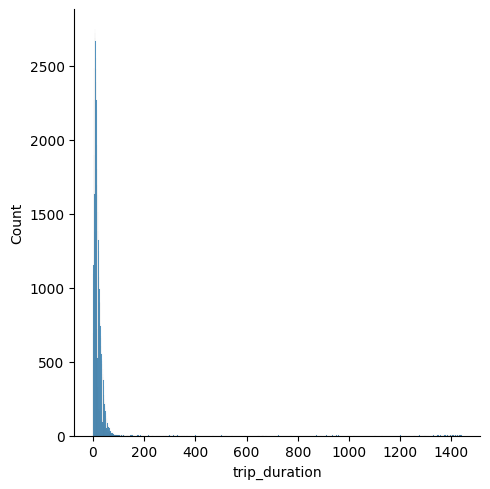

In [71]:
sns.displot(df_01_21['trip_duration'])

In [72]:
df_01_21['trip_duration'].describe()

count    69271.000000
mean        20.622652
std         62.238390
min          0.000000
25%          8.000000
50%         14.000000
75%         23.566667
max       1439.600000
Name: trip_duration, dtype: float64

In [73]:
df_01_21['trip_duration'].describe(percentiles=[0.95, 0.98, 0.99])

count    69271.000000
mean        20.622652
std         62.238390
min          0.000000
50%         14.000000
95%         45.000000
98%         57.000000
99%         69.000000
max       1439.600000
Name: trip_duration, dtype: float64

Extra filtering

In [74]:
df_01_21 = df_01_21[(df_01_21['trip_duration'] >=1) & (df_01_21['trip_duration'] <=60)]

df_01_21

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,trip_duration
0,2,2021-01-01 00:15:56,2021-01-01 00:19:52,N,1.0,43,151,1.0,1.01,5.50,...,0.5,0.00,0.00,None,0.3,6.80,2.0,1.0,0.00,3.933333
1,2,2021-01-01 00:25:59,2021-01-01 00:34:44,N,1.0,166,239,1.0,2.53,10.00,...,0.5,2.81,0.00,None,0.3,16.86,1.0,1.0,2.75,8.750000
2,2,2021-01-01 00:45:57,2021-01-01 00:51:55,N,1.0,41,42,1.0,1.12,6.00,...,0.5,1.00,0.00,None,0.3,8.30,1.0,1.0,0.00,5.966667
3,2,2020-12-31 23:57:51,2021-01-01 00:04:56,N,1.0,168,75,1.0,1.99,8.00,...,0.5,0.00,0.00,None,0.3,9.30,2.0,1.0,0.00,7.083333
7,2,2021-01-01 00:26:31,2021-01-01 00:28:50,N,1.0,75,75,6.0,0.45,3.50,...,0.5,0.96,0.00,None,0.3,5.76,1.0,1.0,0.00,2.316667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,2,2021-01-31 21:38:00,2021-01-31 22:16:00,None,NaN,81,90,NaN,17.63,56.23,...,0.0,0.00,6.12,None,0.3,65.40,NaN,NaN,NaN,38.000000
76514,2,2021-01-31 22:43:00,2021-01-31 23:21:00,None,NaN,35,213,NaN,18.36,46.66,...,0.0,12.20,6.12,None,0.3,65.28,NaN,NaN,NaN,38.000000
76515,2,2021-01-31 22:16:00,2021-01-31 22:27:00,None,NaN,74,69,NaN,2.50,18.95,...,0.0,0.00,0.00,None,0.3,22.00,NaN,NaN,NaN,11.000000
76516,2,2021-01-31 23:10:00,2021-01-31 23:37:00,None,NaN,168,215,NaN,14.48,48.87,...,0.0,0.00,6.12,None,0.3,58.04,NaN,NaN,NaN,27.000000


In [75]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']

### Train a model

import ML models

In [119]:
from sklearn.feature_extraction import DictVectorizer # import dict vectorize
from sklearn.linear_model import LinearRegression # import linear regression model
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [76]:
df_01_21[categorical + numerical]

,PULocationID,DOLocationID,trip_distance
0,43,151,1.01
1,166,239,2.53
2,41,42,1.12
3,168,75,1.99
7,75,75,0.45
...,...,...,...
76513,81,90,17.63
76514,35,213,18.36
76515,74,69,2.50
76516,168,215,14.48


Convert our df into dictionary

In [81]:
df_01_21_dict = df_01_21[categorical + numerical].to_dict(orient='records')
df_01_21_dict

[{'PULocationID': 43, 'DOLocationID': 151, 'trip_distance': 1.01},
 {'PULocationID': 166, 'DOLocationID': 239, 'trip_distance': 2.53},
 {'PULocationID': 41, 'DOLocationID': 42, 'trip_distance': 1.12},
 {'PULocationID': 168, 'DOLocationID': 75, 'trip_distance': 1.99},
 {'PULocationID': 75, 'DOLocationID': 75, 'trip_distance': 0.45},
 {'PULocationID': 225, 'DOLocationID': 265, 'trip_distance': 12.19},
 {'PULocationID': 244, 'DOLocationID': 244, 'trip_distance': 3.39},
 {'PULocationID': 75, 'DOLocationID': 213, 'trip_distance': 6.69},
 {'PULocationID': 74, 'DOLocationID': 238, 'trip_distance': 2.34},
 {'PULocationID': 74, 'DOLocationID': 60, 'trip_distance': 5.48},
 {'PULocationID': 74, 'DOLocationID': 116, 'trip_distance': 2.08},
 {'PULocationID': 116, 'DOLocationID': 143, 'trip_distance': 4.64},
 {'PULocationID': 75, 'DOLocationID': 42, 'trip_distance': 1.68},
 {'PULocationID': 74, 'DOLocationID': 75, 'trip_distance': 0.68},
 {'PULocationID': 7, 'DOLocationID': 82, 'trip_distance': 2.7}

Vectorize our dict

In [82]:
dv = DictVectorizer()

In [83]:
X_train = dv.fit_transform(df_01_21_dict)

Now we get the matrix

In [84]:
X_train

<66922x3 sparse matrix of type '<class 'numpy.float64'>'
	with 200766 stored elements in Compressed Sparse Row format>

Set a target variable

In [86]:
target = 'trip_duration'
y_train = df_01_21[target].values
y_train

array([ 3.93333333,  8.75      ,  5.96666667, ..., 11.        ,
       27.        , 10.        ])

Finally train our model

In [89]:
lr = LinearRegression()

In [90]:
lr.fit(X_train, y_train)

LinearRegression()

In [91]:
y_pred = lr.predict(X_train)

/tmp/ipykernel_7827/2772668395.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, label='prediction')
/tmp/ipykernel_7827/2772668395.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train, label='actual')


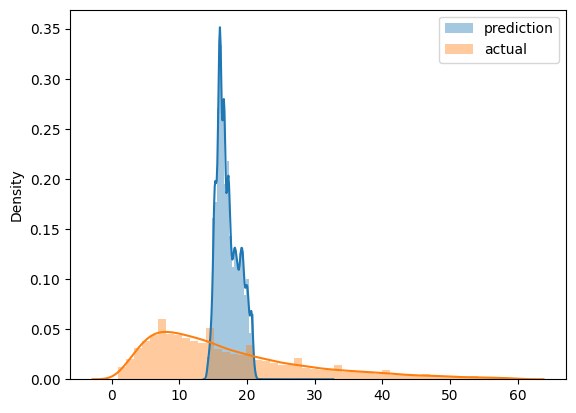

In [93]:
sns.distplot(y_pred, label='prediction')
sns.distplot(y_train, label='actual')


plt.legend()

Check a quality of our model

In [97]:
mean_squared_error(y_train, y_pred, squared=False)

11.631537484960464

Let's reorganize our code and put it into functions

1. A function for reading the data

In [107]:
def read_dataframe(filename):    
    df = pd.read_parquet(filename)
    
    df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
    df['trip_duration'] = df['trip_duration'].apply(lambda x: x.total_seconds()/60)

    df = df[(df['trip_duration'] >=1) & (df['trip_duration'] <=60)]

    categorical = ['PULocationID', 'DOLocationID']
    df[categorical] = df[categorical].astype(str)

    return df    

In [108]:
df_train = read_dataframe('/home/timur/work_hub/mlops_zoomcamp_2024/01-intro/data/green_tripdata_2021-01.parquet')
df_val = read_dataframe('/home/timur/work_hub/mlops_zoomcamp_2024/01-intro/data/green_tripdata_2021-02.parquet')

2. A function for training the model

In [112]:
categorical = ['PULocationID', 'DOLocationID']
numerical = ['trip_distance']


dv = DictVectorizer()

train_dicts = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [115]:
target = 'trip_duration'
y_train = df_train[target].values
y_val = df_val[target].values

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

10.496651120492572

Our model doesn't look great. So we can try another model, for example Lasso Regression

In [118]:
lr = Lasso(alpha=0.05)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

11.439943687389436

Ridge Regression

In [121]:
lr = Ridge()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_val)

mean_squared_error(y_val, y_pred, squared=False)

10.860753390360305

Save the model

In [122]:
import pickle

In [123]:
with open('models/lin_reg.bin', 'wb') as f_out:
    pickle.dump((dv, lr), f_out)